In [1]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import (
    KMeans,
    SpectralClustering,
    AgglomerativeClustering,
    DBSCAN,
    OPTICS,
)  # DBSCAN, OPTICS 密度聚类
from sklearn.neighbors import kneighbors_graph

# 1.轮廓系数
# 对于不正确的 clustering （聚类），分数为 -1 ， highly dense clustering （高密度聚类）为 +1 。
# 零点附近的分数表示 overlapping clusters （重叠的聚类）。
# silhouette_score()计算所有点的平均轮廓系数，而silhouette_samples()返回每个点的轮廓系数。
from sklearn.metrics.cluster import silhouette_score, silhouette_samples

# 2.CH分数,结果越大,评估越好
from sklearn.metrics.cluster import calinski_harabasz_score

# 3.戴维森堡丁指数 值最小是0，值越小，代表聚类效果越好
from sklearn.metrics.cluster import davies_bouldin_score

# 4.需要label_ture,结果在0~1之间,越接近1越好
# 返回 homogeneity, completeness, v_measure(Harmonic mean of the first two)
from sklearn.metrics.cluster import homogeneity_completeness_v_measure

import matplotlib.pyplot as plt

# 创建数据集
https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py

In [2]:
n_samples = 1500
blobs_x, blobs_y = datasets.make_blobs(
    n_samples=n_samples, n_features=2, centers=4, random_state=0
)
# 大圆套小圆
circles_x, circles_y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
)
# 生成两个半圆
moons_x, moons_y = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=0)

## 展示数据

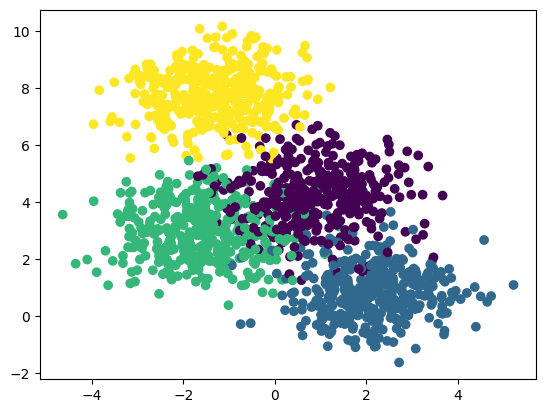

In [3]:
plt.scatter(blobs_x[:, 0], blobs_x[:, 1], c=blobs_y)

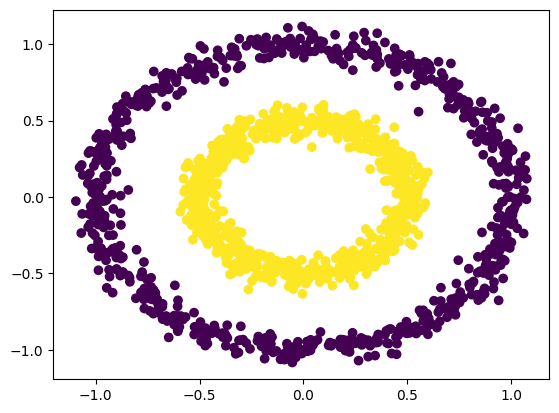

In [4]:
plt.scatter(circles_x[:, 0], circles_x[:, 1], c=circles_y)

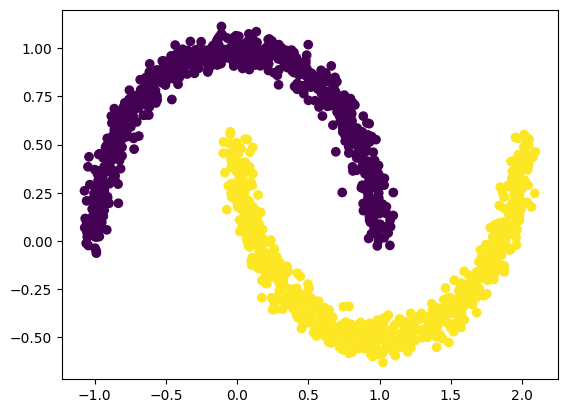

In [5]:
plt.scatter(moons_x[:, 0], moons_x[:, 1], c=moons_y)

## score得分函数

In [6]:
def get_score(x, y, pred_y: list):
    print("silhouette_score, bigger is better")
    for y_ in pred_y:
        print(silhouette_score(x, y_))
    print()

    print("calinski_harabasz_score, bigger is better")
    for y_ in pred_y:
        print(calinski_harabasz_score(x, y_))
    print()

    print("davies_bouldin_score, smaller is better")
    for y_ in pred_y:
        print(davies_bouldin_score(x, y_))
    print()

    print("homogeneity_completeness_v_measure, bigger is better")
    for y_ in pred_y:
        print(homogeneity_completeness_v_measure(y, y_))

# 聚类

## blobs

### KMeans

In [7]:
#               4种类别
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans

KMeans(n_clusters=4, random_state=0)

In [8]:
kmeans_y_pred = kmeans.fit_predict(blobs_x)
kmeans_y_pred

array([1, 1, 1, ..., 1, 2, 3])

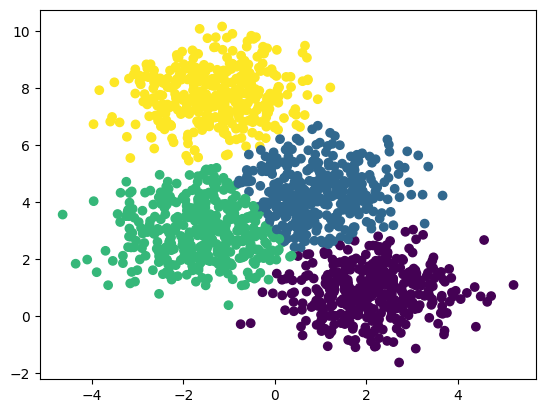

In [9]:
plt.scatter(blobs_x[:, 0], blobs_x[:, 1], c=kmeans_y_pred)

### SpectralClustering 谱聚类

In [10]:
# n_clusters: The dimension of the projection subspace.
# eigen_solver: {‘arpack’, ‘lobpcg’, ‘amg’}, default=None
#   The eigenvalue decomposition strategy to use.AMG requires pyamg to be installed.
#   It can be faster on very large, sparse problems, but may also lead to instabilities.
#   If None, then 'arpack' is used. See [4] for more details regarding 'lobpcg'.
# affinity: str or callable, default=’rbf’
#   How to construct the affinity matrix.
#   ‘nearest_neighbors’: construct the affinity matrix by computing a graph of nearest neighbors.
#   ‘rbf’: construct the affinity matrix using a radial basis function (RBF) kernel.
#   ‘precomputed’: interpret X as a precomputed affinity matrix, where larger values indicate greater similarity between instances.
#   ‘precomputed_nearest_neighbors’: interpret X as a sparse graph of precomputed distances, and construct a binary affinity matrix from the n_neighbors nearest neighbors of each instance.
#   one of the kernels supported by pairwise_kernels.
spectral = SpectralClustering(
    n_clusters=4,
    eigen_solver="arpack",
    affinity="nearest_neighbors",
)
spectral

SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=4)

In [11]:
spectral_y_pred = spectral.fit_predict(blobs_x)
spectral_y_pred

array([3, 3, 3, ..., 3, 1, 2])

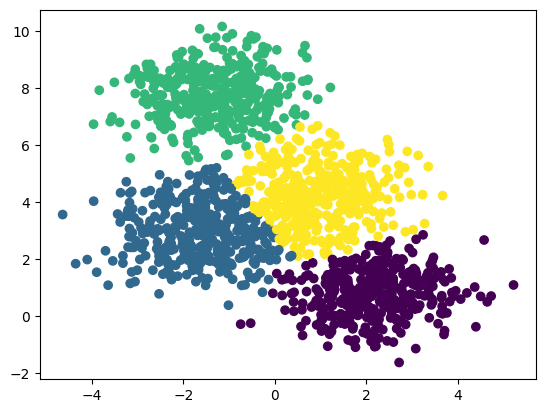

In [12]:
plt.scatter(blobs_x[:, 0], blobs_x[:, 1], c=spectral_y_pred)

### AgglomerativeClustering 层次聚类

In [13]:
connectivity = kneighbors_graph(blobs_x, n_neighbors=4, include_self=False)
connectivity

<1500x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 6000 stored elements in Compressed Sparse Row format>

In [14]:
# n_clusters: The number of clusters to find.
# metric: Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”.
#         If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix is needed as input for the fit method.
# connectivity: Connectivity matrix. Defines for each sample the neighboring samples following a given structure of the data.
#         This can be a connectivity matrix itself or a callable that transforms the data into a connectivity matrix,
#         such as derived from kneighbors_graph. Default is None, i.e, the hierarchical clustering algorithm is unstructured.
# linkage: {‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
#         Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
#         ‘ward’ minimizes the variance of the clusters being merged.
#         ‘average’ uses the average of the distances of each observation of the two sets.
#         ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
#         ‘single’ uses the minimum of the distances between all observations of the two sets.
agglo = AgglomerativeClustering(
    n_clusters=4,
    metric="cityblock",
    connectivity=connectivity,
    linkage="average",
)
agglo

AgglomerativeClustering(connectivity=<1500x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 6000 stored elements in Compressed Sparse Row format>,
                        linkage='average', metric='cityblock', n_clusters=4)

In [15]:
agglo_y_pred = agglo.fit_predict(blobs_x)
agglo_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

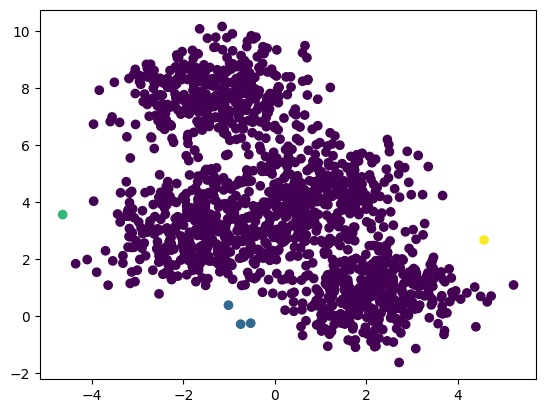

In [16]:
plt.scatter(blobs_x[:, 0], blobs_x[:, 1], c=agglo_y_pred)

### DBSCAN 基于密度的聚类

(Density-Based Spatial Clustering of Applications with Noise) 基于密度的聚类算法

In [17]:
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
dbscan = DBSCAN(eps=0.3)
dbscan

DBSCAN(eps=0.3)

In [18]:
dbscan_y_pred = dbscan.fit_predict(blobs_x)
dbscan_y_pred

array([-1, -1,  0, ...,  0,  0,  1], dtype=int64)

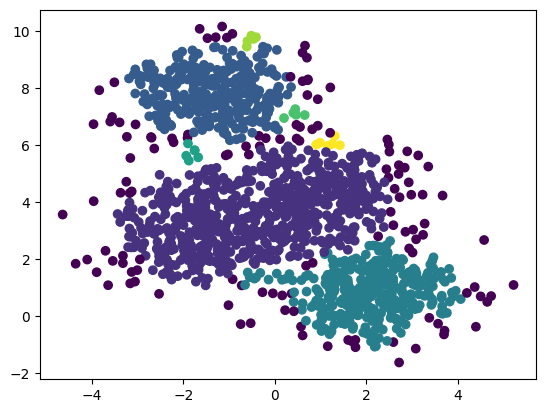

In [19]:
plt.scatter(blobs_x[:, 0], blobs_x[:, 1], c=dbscan_y_pred)

### OPTICS 基于密度的聚类

OPTICS : A similar clustering at multiple values of eps. Our implementation is optimized for memory usage.

In [20]:
# min_samples: 将某个点视为核心点的邻域中的样本数。
# xi: float between 0 and 1, default=0.05
#   Determines the minimum steepness on the reachability plot that constitutes a cluster boundary.
# min_cluster_size: Minimum number of samples in an OPTICS cluster, expressed as
#   an absolute number or a fraction of the number of samples (rounded to be at least 2)
#   小数: 一个类别至少占总数的比例
#   整数: 一个类别至少的个数
optics = OPTICS(
    min_samples=5,
    xi=0.05,
    min_cluster_size=0.24,
)
optics

OPTICS(min_cluster_size=0.24)

In [21]:
optics_y_pred = optics.fit_predict(blobs_x)
optics_y_pred

array([0, 0, 0, ..., 0, 0, 0])

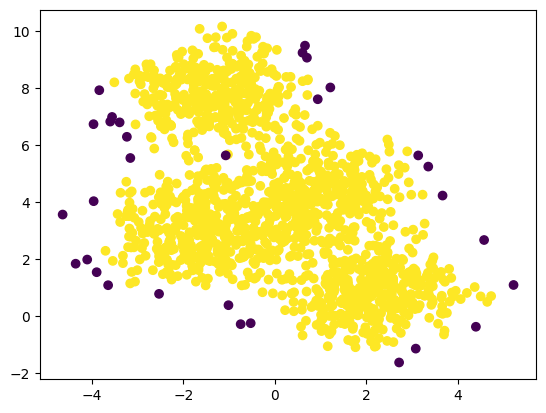

In [22]:
plt.scatter(blobs_x[:, 0], blobs_x[:, 1], c=optics_y_pred)

### score

In [23]:
get_score(
    blobs_x,
    blobs_y,
    [kmeans_y_pred, spectral_y_pred, agglo_y_pred, dbscan_y_pred, optics_y_pred],
)

silhouette_score, bigger is better
0.5085647650519791
0.5073219847738035
-0.10804948782927681
0.10998969550058908
0.2332041402894007

calinski_harabasz_score, bigger is better
2634.7227427499365
2621.5002093868247
3.019367530006607
435.17731475509754
1.494850794154258

davies_bouldin_score, smaller is better
0.6956403917467311
0.7060615354588222
0.7062977224068175
2.9452080002236793
10.195668314135732

homogeneity_completeness_v_measure, bigger is better
(0.7963085378678059, 0.7965290686147256, 0.79641878797486)
(0.7989688456524293, 0.7990811306182324, 0.7990249841905501)
(0.0024193811466291706, 0.13148742503814742, 0.004751337235497085)
(0.5880441405948398, 0.6196228251677509, 0.6034206152002101)
(0.0016772514706599139, 0.023107809463511934, 0.0031274974477039337)


## circles

### KMeans

In [24]:
#               2种类别
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans

KMeans(n_clusters=2, random_state=0)

In [25]:
kmeans_y_pred = kmeans.fit_predict(circles_x)
kmeans_y_pred

array([0, 1, 1, ..., 0, 1, 1])

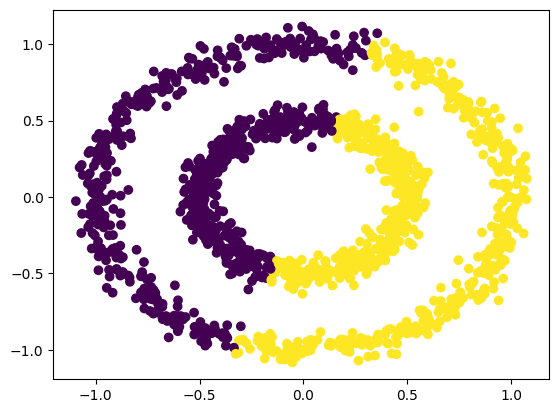

In [26]:
plt.scatter(circles_x[:, 0], circles_x[:, 1], c=kmeans_y_pred)

### SpectralClustering 谱聚类

SpectralClustering 似乎没法分辨多层圆环

In [27]:
# n_clusters: The dimension of the projection subspace.
# eigen_solver: {‘arpack’, ‘lobpcg’, ‘amg’}, default=None
#   The eigenvalue decomposition strategy to use.AMG requires pyamg to be installed.
#   It can be faster on very large, sparse problems, but may also lead to instabilities.
#   If None, then 'arpack' is used. See [4] for more details regarding 'lobpcg'.
# affinity: str or callable, default=’rbf’
#   How to construct the affinity matrix.
#   ‘nearest_neighbors’: construct the affinity matrix by computing a graph of nearest neighbors.
#   ‘rbf’: construct the affinity matrix using a radial basis function (RBF) kernel.
#   ‘precomputed’: interpret X as a precomputed affinity matrix, where larger values indicate greater similarity between instances.
#   ‘precomputed_nearest_neighbors’: interpret X as a sparse graph of precomputed distances, and construct a binary affinity matrix from the n_neighbors nearest neighbors of each instance.
#   one of the kernels supported by pairwise_kernels.
spectral = SpectralClustering(
    n_clusters=2,
    eigen_solver="arpack",
    affinity="nearest_neighbors",  # 分隔圆形需要用这个
)
spectral

SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=2)

In [28]:
spectral_y_pred = spectral.fit_predict(circles_x)
spectral_y_pred

array([1, 1, 0, ..., 0, 1, 1])

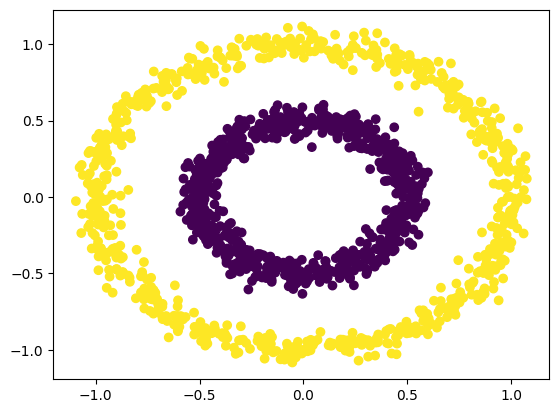

In [29]:
plt.scatter(circles_x[:, 0], circles_x[:, 1], c=spectral_y_pred)

### AgglomerativeClustering 层次聚类

In [30]:
connectivity = kneighbors_graph(circles_x, n_neighbors=4, include_self=False)
connectivity

<1500x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 6000 stored elements in Compressed Sparse Row format>

In [31]:
# n_clusters: The number of clusters to find.
# metric: Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”.
#         If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix is needed as input for the fit method.
# connectivity: Connectivity matrix. Defines for each sample the neighboring samples following a given structure of the data.
#         This can be a connectivity matrix itself or a callable that transforms the data into a connectivity matrix,
#         such as derived from kneighbors_graph. Default is None, i.e, the hierarchical clustering algorithm is unstructured.
# linkage: {‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
#         Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
#         ‘ward’ minimizes the variance of the clusters being merged.
#         ‘average’ uses the average of the distances of each observation of the two sets.
#         ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
#         ‘single’ uses the minimum of the distances between all observations of the two sets.
agglo = AgglomerativeClustering(
    n_clusters=2,
    metric="cityblock",
    connectivity=connectivity,  # 分割圆形需要这个
    linkage="average",
)
agglo

AgglomerativeClustering(connectivity=<1500x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 6000 stored elements in Compressed Sparse Row format>,
                        linkage='average', metric='cityblock')

In [32]:
agglo_y_pred = agglo.fit_predict(circles_x)
agglo_y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

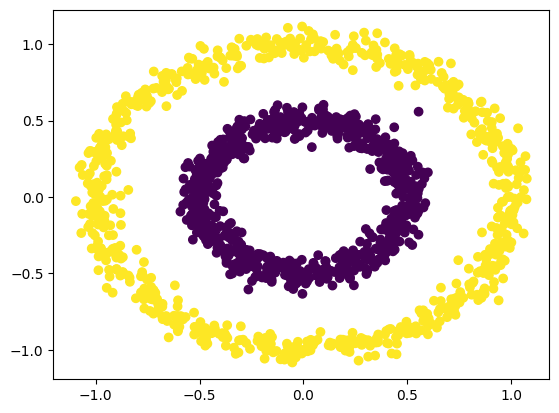

In [33]:
plt.scatter(circles_x[:, 0], circles_x[:, 1], c=agglo_y_pred)

### DBSCAN 基于密度的聚类

(Density-Based Spatial Clustering of Applications with Noise) 基于密度的聚类算法

In [34]:
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
dbscan = DBSCAN(eps=0.15)
dbscan

DBSCAN(eps=0.15)

In [35]:
dbscan_y_pred = dbscan.fit_predict(circles_x)
dbscan_y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

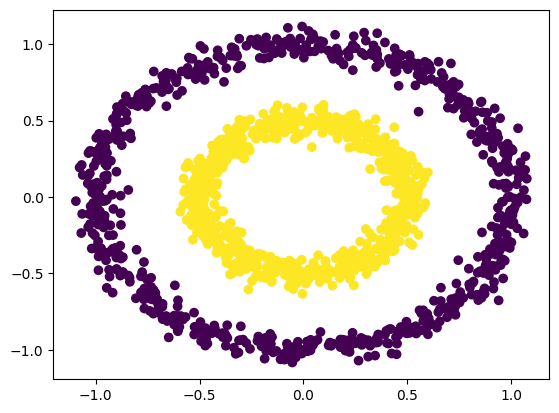

In [36]:
plt.scatter(circles_x[:, 0], circles_x[:, 1], c=dbscan_y_pred)

### OPTICS 基于密度的聚类

OPTICS : A similar clustering at multiple values of eps. Our implementation is optimized for memory usage.

In [37]:
# min_samples: 将某个点视为核心点的邻域中的样本数。
# xi: float between 0 and 1, default=0.05
#   Determines the minimum steepness on the reachability plot that constitutes a cluster boundary.
# min_cluster_size: Minimum number of samples in an OPTICS cluster, expressed as
#   an absolute number or a fraction of the number of samples (rounded to be at least 2)
#   小数: 一个类别至少占总数的比例
#   整数: 一个类别至少的个数
optics = OPTICS(
    min_samples=5,
    xi=0.05,
    min_cluster_size=0.3,
)
optics

OPTICS(min_cluster_size=0.3)

In [38]:
optics_y_pred = optics.fit_predict(circles_x)
optics_y_pred

array([0, 0, 1, ..., 1, 0, 0])

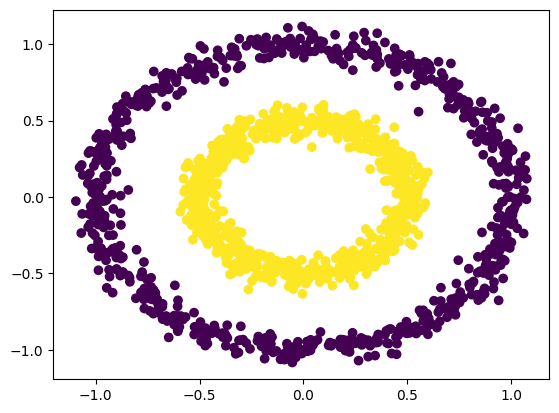

In [39]:
plt.scatter(circles_x[:, 0], circles_x[:, 1], c=optics_y_pred)

### score

In [40]:
get_score(
    blobs_x,
    blobs_y,
    [kmeans_y_pred, spectral_y_pred, agglo_y_pred, dbscan_y_pred, optics_y_pred],
)

silhouette_score, bigger is better
0.000990455925455801
0.0006444337424483576
0.0005551397410149885
0.0006444337424483576
0.0006444337424483576

calinski_harabasz_score, bigger is better
3.2873673431982318
1.6857957460991915
1.5565716190924659
1.6857957460991915
1.6857957460991915

davies_bouldin_score, smaller is better
19.218104403219137
26.82858424702572
27.92055688449226
26.82858424702572
26.82858424702572

homogeneity_completeness_v_measure, bigger is better
(0.0009106486553865459, 0.0018212996464004214, 0.0012141987262099128)
(0.00044385197113867186, 0.0008877039422773437, 0.0005918026281848959)
(0.0004226892814450364, 0.0008453796470015265, 0.0005635859495068322)
(0.00044385197113867186, 0.0008877039422773437, 0.0005918026281848959)
(0.00044385197113867186, 0.0008877039422773437, 0.0005918026281848959)


## moons

### KMeans

In [41]:
#               2种类别
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans

KMeans(n_clusters=2, random_state=0)

In [42]:
kmeans_y_pred = kmeans.fit_predict(moons_x)
kmeans_y_pred

array([0, 1, 1, ..., 1, 0, 0])

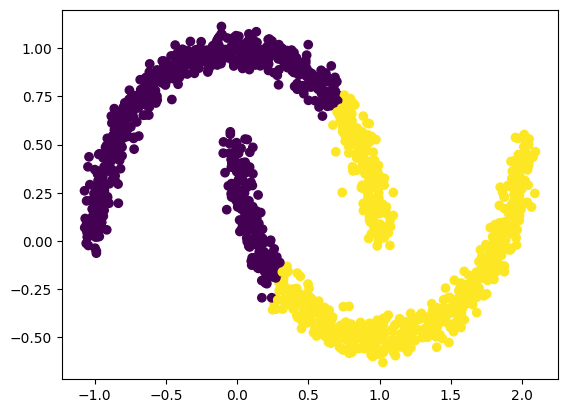

In [43]:
plt.scatter(moons_x[:, 0], moons_x[:, 1], c=kmeans_y_pred)

### SpectralClustering 谱聚类

In [44]:
# n_clusters: The dimension of the projection subspace.
# eigen_solver: {‘arpack’, ‘lobpcg’, ‘amg’}, default=None
#   The eigenvalue decomposition strategy to use.AMG requires pyamg to be installed.
#   It can be faster on very large, sparse problems, but may also lead to instabilities.
#   If None, then 'arpack' is used. See [4] for more details regarding 'lobpcg'.
# affinity: str or callable, default=’rbf’
#   How to construct the affinity matrix.
#   ‘nearest_neighbors’: construct the affinity matrix by computing a graph of nearest neighbors.
#   ‘rbf’: construct the affinity matrix using a radial basis function (RBF) kernel.
#   ‘precomputed’: interpret X as a precomputed affinity matrix, where larger values indicate greater similarity between instances.
#   ‘precomputed_nearest_neighbors’: interpret X as a sparse graph of precomputed distances, and construct a binary affinity matrix from the n_neighbors nearest neighbors of each instance.
#   one of the kernels supported by pairwise_kernels.
spectral = SpectralClustering(
    n_clusters=2,
    eigen_solver="arpack",
    affinity="nearest_neighbors",  # 分隔月牙形形需要用这个
)
spectral

SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=2)

In [45]:
spectral_y_pred = spectral.fit_predict(moons_x)
spectral_y_pred

c:\miniconda3\envs\pytorch\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


array([1, 1, 0, ..., 0, 1, 1])

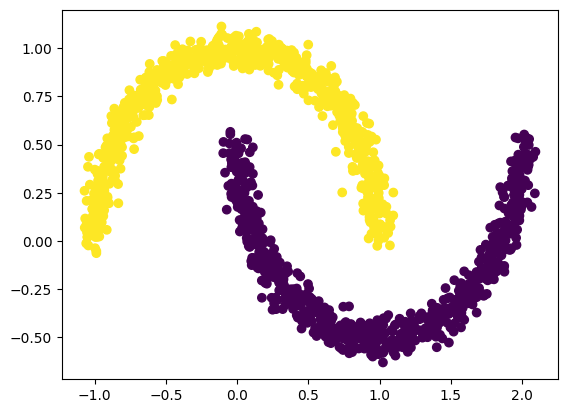

In [46]:
plt.scatter(moons_x[:, 0], moons_x[:, 1], c=spectral_y_pred)

### AgglomerativeClustering 层次聚类

In [47]:
connectivity = kneighbors_graph(moons_x, n_neighbors=3, include_self=False)
connectivity

<1500x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 4500 stored elements in Compressed Sparse Row format>

In [58]:
# n_clusters: The number of clusters to find.
# metric: Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”.
#         If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix is needed as input for the fit method.
# connectivity: Connectivity matrix. Defines for each sample the neighboring samples following a given structure of the data.
#         This can be a connectivity matrix itself or a callable that transforms the data into a connectivity matrix,
#         such as derived from kneighbors_graph. Default is None, i.e, the hierarchical clustering algorithm is unstructured.
# linkage: {‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
#         Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
#         ‘ward’ minimizes the variance of the clusters being merged.
#         ‘average’ uses the average of the distances of each observation of the two sets.
#         ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
#         ‘single’ uses the minimum of the distances between all observations of the two sets.
agglo = AgglomerativeClustering(
    n_clusters=2,
    metric="cityblock",
    connectivity=connectivity,  # 分割月牙需要这个
    linkage="average",
)
agglo

AgglomerativeClustering(connectivity=<1500x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 4500 stored elements in Compressed Sparse Row format>,
                        linkage='average', metric='cityblock')

In [59]:
agglo_y_pred = agglo.fit_predict(moons_x)
agglo_y_pred

c:\miniconda3\envs\pytorch\Lib\site-packages\sklearn\cluster\_agglomerative.py:593: UserWarning: the number of connected components of the connectivity matrix is 9 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

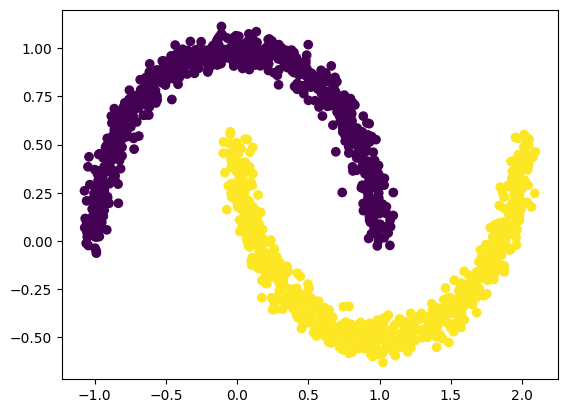

In [60]:
plt.scatter(moons_x[:, 0], moons_x[:, 1], c=agglo_y_pred)

### DBSCAN 基于密度的聚类

(Density-Based Spatial Clustering of Applications with Noise) 基于密度的聚类算法

In [51]:
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
dbscan = DBSCAN(eps=0.14)
dbscan

DBSCAN(eps=0.14)

In [52]:
dbscan_y_pred = dbscan.fit_predict(moons_x)
dbscan_y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

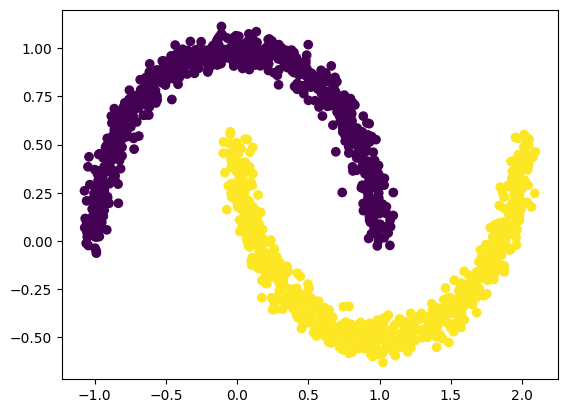

In [53]:
plt.scatter(moons_x[:, 0], moons_x[:, 1], c=dbscan_y_pred)

### OPTICS 基于密度的聚类

OPTICS : A similar clustering at multiple values of eps. Our implementation is optimized for memory usage.

In [54]:
# min_samples: 将某个点视为核心点的邻域中的样本数。
# xi: float between 0 and 1, default=0.05
#   Determines the minimum steepness on the reachability plot that constitutes a cluster boundary.
# min_cluster_size: Minimum number of samples in an OPTICS cluster, expressed as
#   an absolute number or a fraction of the number of samples (rounded to be at least 2)
#   小数: 一个类别至少占总数的比例
#   整数: 一个类别至少的个数
optics = OPTICS(
    min_samples=5,
    xi=0.05,
    min_cluster_size=0.3,
)
optics

OPTICS(min_cluster_size=0.3)

In [55]:
optics_y_pred = optics.fit_predict(moons_x)
optics_y_pred

array([0, 0, 1, ..., 1, 0, 0])

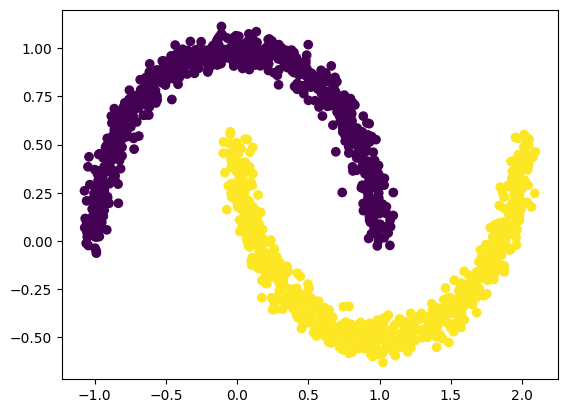

In [56]:
plt.scatter(moons_x[:, 0], moons_x[:, 1], c=optics_y_pred)

### score

In [57]:
get_score(
    blobs_x,
    blobs_y,
    [kmeans_y_pred, spectral_y_pred, agglo_y_pred, dbscan_y_pred, optics_y_pred],
)

silhouette_score, bigger is better
2.0219781117441864e-05
0.0006444337424483576
0.0013410463157468107
0.0006444337424483576
0.0006444337424483576

calinski_harabasz_score, bigger is better
0.8475702114216173
1.6857957460991915
2.2118606192993564
1.6857957460991915
1.6857957460991915

davies_bouldin_score, smaller is better
37.84709967817934
26.82858424702572
22.745488791063092
26.82858424702572
26.82858424702572

homogeneity_completeness_v_measure, bigger is better
(0.0005613001608941036, 0.0011226132785316372, 0.0007484030937796348)
(0.00044385197113867186, 0.0008877039422773437, 0.0005918026281848959)
(0.0010026786865620111, 0.0020931831032463166, 0.0013558680762856359)
(0.00044385197113867186, 0.0008877039422773437, 0.0005918026281848959)
(0.00044385197113867186, 0.0008877039422773437, 0.0005918026281848959)
